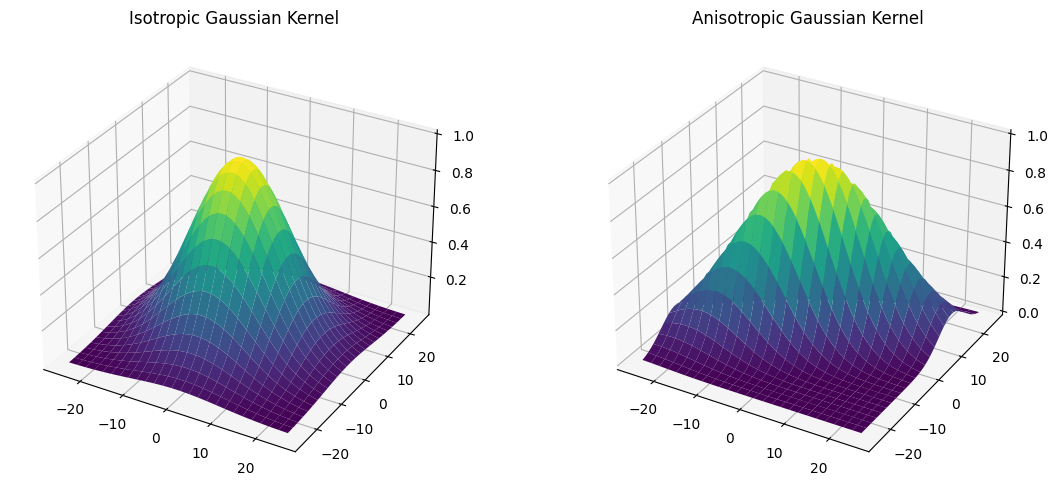

In [ ]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义二维高斯核函数
def gaussian_kernel_2d(size, sigma_x, sigma_y, theta=0):
    """ 生成二维各向同性或各向异性的高斯核 """
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)

    # 旋转变换
    theta = np.deg2rad(theta)
    x_rot = xx * np.cos(theta) + yy * np.sin(theta)
    y_rot = -xx * np.sin(theta) + yy * np.cos(theta)

    kernel = np.exp(- (x_rot**2 / (2 * sigma_x**2) + y_rot**2 / (2 * sigma_y**2)))
    return kernel

# 设置参数
size = 51  # 核函数尺寸
sigma_iso = 10  # 各向同性高斯核的标准差
sigma_x_aniso, sigma_y_aniso = 15, 5  # 各向异性高斯核的标准差
theta_aniso = 30  # 各向异性高斯核旋转角度

# 生成各向同性和各向异性高斯核
gaussian_iso = gaussian_kernel_2d(size, sigma_iso, sigma_iso)  # 各向同性
gaussian_aniso = gaussian_kernel_2d(size, sigma_x_aniso, sigma_y_aniso, theta_aniso)  # 各向异性

# 创建网格坐标
x = np.linspace(-(size // 2), size // 2, size)
y = np.linspace(-(size // 2), size // 2, size)
X, Y = np.meshgrid(x, y)

# 绘制 3D 图像
fig = plt.figure(figsize=(12, 5))

# 各向同性高斯核
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_title("Isotropic Gaussian Kernel", fontsize=12)
ax1.plot_surface(X, Y, gaussian_iso, cmap='viridis')
# 调整布局并显示
plt.tight_layout()
plt.show()

# 各向异性高斯核
ax2 = fig.add_subplot(111, projection='3d')
ax2.set_title("Anisotropic Gaussian Kernel", fontsize=12)
ax2.plot_surface(X, Y, gaussian_aniso, cmap='viridis')

# 调整布局并显示
plt.tight_layout()
plt.show()
